In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
vaers_df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Bangkit Capstone Project Team/Notebooks/2021VAERSData/2021VAERSDATA.csv', sep=',', encoding = "ISO-8859-1", dtype={
    'RPT_DATE': str,
    'ER_VISIT': str,
    'V_FUNDBY': str,
    'SYMPTOM_TEXT': str
})
vaers_df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

1. Which age group experience more symptoms?
2. Why are they die?
3. Any corr between L_THREAT and DIED?

In [132]:
vaers_sym = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/Bangkit Capstone Project Team/Notebooks/2021VAERSData/2021VAERSSYMPTOMS.csv', sep=',', encoding = "ISO-8859-1")
vaers_sym.columns

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [133]:
vaers_sym = vaers_sym[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

# Finding top N terms 

In [134]:
concatvalues = np.concatenate([vaers_sym.SYMPTOM1.values,vaers_sym.SYMPTOM2.values, vaers_sym.SYMPTOM3.values, vaers_sym.SYMPTOM4.values,
                               vaers_sym.SYMPTOM5.values])

In [135]:
vaersym = pd.DataFrame(concatvalues, columns=['symptom']).dropna()

In [136]:
import re
vaersym['symptom'] = vaersym['symptom'].apply(lambda x: x.lower())
vaersym['symptom'] = vaersym['symptom'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', '', x.strip()))

In [137]:
vaersym = pd.DataFrame(vaersym.value_counts()).reset_index()
vaersym.columns = ['symptom','count']

In [138]:
feature = vaersym.head(20)
feature['gejala'] = ['Sakit kepala','demam','menggigil','kelelahan','nyeri','mual/muntah','pusing','nyeri parah','sakit di tempat suntik',
                     'nyeri otot','kemerahanan di tempat suntik','nyeri sendi','sesak napas','gatal-gatal','pembengkakan di tempat suntik',
                     'muntah','ruam','lemah','gatal di tempat suntik','kemerahan']
feature = feature.drop([1,4,6,7,15,16,17, 19])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [140]:
feature2 = vaersym.iloc[[20,21,22,25,26,27,30,31,32,33,35,42,43,47]]
feature2['gejala']=['keringat berlebih','diare', 'kesemutan','biduran','mati rasa', 'limfadenopati','batuk','tremor','detak jatung meningkat','sakit pada dada','bengkak kaki/tangan', 'covid-19','pingsan','sakit leher']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [143]:
feature = feature.append(feature2, ignore_index=True)

In [145]:
feature_all = vaersym.head(50)['symptom']
feature_all

0                       headache
1                        pyrexia
2                         chills
3                        fatigue
4                           pain
5                         nausea
6                      dizziness
7              pain in extremity
8            injection site pain
9                        myalgia
10       injection site erythema
11                    arthralgia
12                      dyspnoea
13                      pruritus
14       injection site swelling
15                      vomiting
16                          rash
17                      asthenia
18       injection site pruritus
19                      erythema
20                 hyperhidrosis
21                     diarrhoea
22                  paraesthesia
23         injection site warmth
24                       malaise
25                     urticaria
26                 hypoaesthesia
27               lymphadenopathy
28              feeling abnormal
29                         death
30        

In [ ]:
print("Input you symptoms:")
input_sym = input("").split(',')
predict(input_sym)

Input you symptoms:
a,b,c,d


# Modelling

In [146]:
vaers_df['label'] = vaers_df[['DIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'ER_ED_VISIT']].notnull().T.any()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


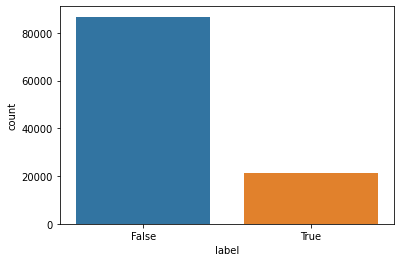

In [147]:
sns.countplot(vaers_df['label'])

In [151]:
X = vaers_sym.fillna('')
X['text']=X['SYMPTOM1']+" "+X['SYMPTOM2']+" "+X['SYMPTOM3']+" "+X['SYMPTOM4']+" "+X['SYMPTOM5']
X = X.drop(['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5'], axis=1)
Z = X.groupby('VAERS_ID')['text'].transform(lambda x:' '.join(x))

In [153]:
X['text']=Z

In [154]:
X = X.drop_duplicates()

In [156]:
X_label = vaers_df[['VAERS_ID','label']]
X = X.merge(X_label, on=['VAERS_ID'], how='inner')

In [196]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, confusion_matrix
 
import statsmodels.api as sm
 
import tensorflow as tf

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X['text'], X['label'], test_size=0.2, random_state=97)

In [193]:
# Preprocess Texts

vocab_size = 8000
embedding_dim = 16
max_length = 150
trunc_type="post"
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [194]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(1e-4),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 16)           128000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               41472     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 202,753
Trainable params: 202,753
Non-trainable params: 0
_________________________________________________________________


In [195]:
num_epochs = 5
history = model.fit(padded, y_train, batch_size=128, epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/5
677/677 [==============================] - 149s 216ms/step - loss: 0.5134 - accuracy: 0.8032 - val_loss: 0.3551 - val_accuracy: 0.8515
Epoch 2/5
677/677 [==============================] - 144s 213ms/step - loss: 0.3312 - accuracy: 0.8607 - val_loss: 0.3025 - val_accuracy: 0.8812
Epoch 3/5
677/677 [==============================] - 143s 211ms/step - loss: 0.3011 - accuracy: 0.8791 - val_loss: 0.2852 - val_accuracy: 0.8836
Epoch 4/5
677/677 [==============================] - 141s 208ms/step - loss: 0.2866 - accuracy: 0.8872 - val_loss: 0.2802 - val_accuracy: 0.8859
Epoch 5/5
677/677 [==============================] - 141s 208ms/step - loss: 0.2801 - accuracy: 0.8873 - val_loss: 0.2795 - val_accuracy: 0.8869


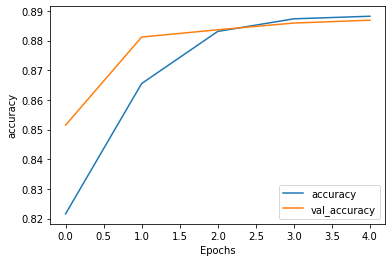

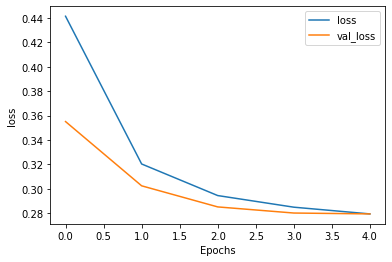

In [197]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [204]:
seed_text = "headache pyrexia neausea"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
padded = pad_sequences([token_list], maxlen=max_length, truncating=trunc_type)
predicted = model.predict_classes(token_list, verbose=0)
print(predicted)

[[0]
 [0]
 [1]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [205]:
X['label'].value_counts()

False    86777
True     21412
Name: label, dtype: int64

# Generate a saved model

In [207]:
export_dir = '/content/drive/MyDrive/Bangkit Capstone Project Team/Notebooks/saved_model/1'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bangkit Capstone Project Team/Notebooks/saved_model/1/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Bangkit Capstone Project Team/Notebooks/saved_model/1/assets
